This notebook will focus on the details of credit card transactions and investigate through both Class 0 (non-fraudulent) and Class 1 (fraudulent) outputs (Class 1).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy import stats

In [2]:
CC = pd.read_csv('creditcard.csv')
CC.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Preprocessing and Exploratory Analysis of Data

In [3]:
CC.shape

(284807, 31)

In [4]:
CC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
CC.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
class     0
dtype: int64

In [6]:
CC['class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: class, dtype: float64

In [7]:
CC.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Proportion of fraud in the data

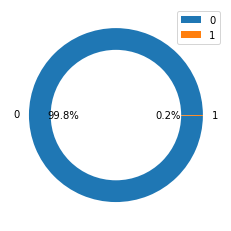

In [8]:
labels = list(CC['class'].value_counts().index)
values = list(CC['class'].value_counts().values)
plt.pie(values, labels=labels, autopct= '%1.1f%%')

circle = plt.Circle(xy = (0, 0), radius = 0.75, facecolor = 'white')
plt.gca().add_artist(circle)
plt.legend()
plt.show()

Fraudulent activities is 0.2% of all transactions

Checking if the amount spent is suggestive of fraudulent transactions

<AxesSubplot:xlabel='class', ylabel='Amount'>

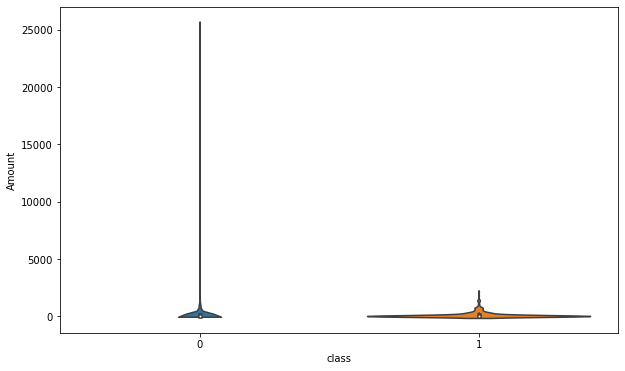

In [9]:
plt.figure(figsize=(10,6))
sns.violinplot(y=CC['Amount'], x=CC['class'])

In [10]:
CC[CC['class'] == 1]['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

The outliers is much and it is reflected in the non-fraudulent transactions.
The decriptive analysis of the fraudulent transactions also indicates that amount transacted is not the only determinant of fraud in the data.

Statistical/Computational-based Data Analysis

In [11]:
X = CC.drop(['Time', 'class'], axis=1)
y = CC['class']

Standardization of the data

In [12]:
X = stats.zscore(X) 
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


Modelling Train_Test_Split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(227845, 29) (227845,) (56962, 29) (56962,)


Accuracy score is not the right metrics to use for an imbalanced dataset such as this. 
The goal is to justify the rare cases within the dataset and reduce it using machine learning algorithms 

Logistic Regression Model

In [14]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
accuracy_score = accuracy_score(y_pred, y_test)
print('Accuracy score is {}%'.format(accuracy_score * 100))


print(classification_report(y_test, y_pred))

Accuracy score is 99.91222218320986%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.58      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.79      0.85     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

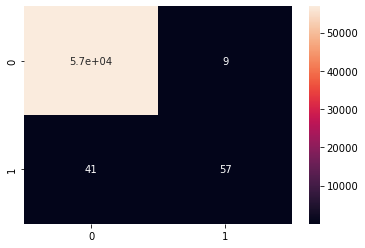

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [18]:
confusion_matrix(y_test, y_pred)

array([[56855,     9],
       [   41,    57]], dtype=int64)

In [19]:
pd.DataFrame(y_pred).value_counts()

0    56896
1       66
dtype: int64

Reducing False Negative (Type II error) is vital for detecting as much fraud as possible, because fraudulent activities can be costly. Optimizing recall is crucial here because it is the fraction of fraudulent cases detected by our classifier, and the cost implication of False Negatives (fraudulent cases) discovered is higher that of False Positives (false alarms) discovered. As a result, I'll adopt different algorithms to accomplish these goals.

Support Vector Machine Model

In [20]:
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [21]:
y_pred = svc_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred, y_test)
print('Accuracy score is {}%'.format(accuracy_score * 100))


print(classification_report(y_test, y_pred))

Accuracy score is 99.92977774656788%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.61      0.75        98

    accuracy                           1.00     56962
   macro avg       0.98      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

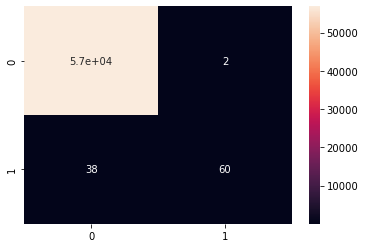

In [24]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Decision Tree Classification Model

In [25]:
CC_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
CC_tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
y_pred = CC_tree.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score = accuracy_score(y_pred, y_test)
print('Accuracy score is {}%'.format(accuracy_score * 100))


print(classification_report(y_test, y_pred))

Accuracy score is 99.9438221972543%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.82      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



<AxesSubplot:>

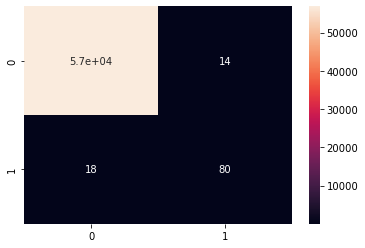

In [28]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

The Type II error has been further decreased using Decision Tree Classification, reducing to 18 with an increase in Recall. When compared to the Logistic Regression and Support Vector Machine models used previously, this model is still the best for our classification.

The F1-Score, which is the highest of the three at 0.83, also indicates that our model will perform better.
The accuracy score is also the highest at 99.94%.

To assist the business, efforts should be taken to guarantee that the Type II error (18) is less than the Type I error(14).

Checking the reliability of the model using ROC-AUC Curve

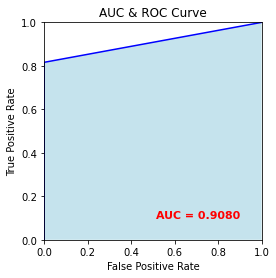

In [29]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, y_pred)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(6, 4))
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'b')
plt.fill_between(fpr, tpr, facecolor='lightblue', alpha=0.7)
plt.text(0.90, 0.10, 'AUC = %0.4f' % auc, ha='right', fontsize=11, weight='bold', color='red')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

AUC Score of 0.908 demonstrates that our model has a good measure of separability and is reliable in classifying cases as fraudulent or non fraudulent (that is classes 1 and 0)  